<a href="https://www.kaggle.com/code/ayeshashaikh232/eda1-automobile-insurance?scriptVersionId=127445612" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import all Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('/kaggle/input/automobile-insurance/insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# usecols for showing selected columns

In [3]:
df1=pd.read_csv('/kaggle/input/automobile-insurance/insurance_claims.csv',usecols=['months_as_customer','age','policy_annual_premium','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','police_report_available','fraud_reported'])
df1.head()

,months_as_customer,age,policy_annual_premium,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1406.91,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,1197.22,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,1413.14,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1415.74,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,1583.91,NO,6500,1300,650,4550,Accura,RSX,2009,N


reaname the columns

In [4]:
df1.rename(columns={'auto_year':'year'},inplace=True)
df1.rename(columns={'auto_make':'vehicle_brand'},inplace=True)
df1.rename(columns={'auto_model':'vehicle_model'},inplace=True)


In [5]:
df1.info() #find the total countt and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   months_as_customer       1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   policy_annual_premium    1000 non-null   float64
 3   police_report_available  1000 non-null   object 
 4   total_claim_amount       1000 non-null   int64  
 5   injury_claim             1000 non-null   int64  
 6   property_claim           1000 non-null   int64  
 7   vehicle_claim            1000 non-null   int64  
 8   vehicle_brand            1000 non-null   object 
 9   vehicle_model            1000 non-null   object 
 10  year                     1000 non-null   int64  
 11  fraud_reported           1000 non-null   object 
dtypes: float64(1), int64(7), object(4)
memory usage: 93.9+ KB


In [6]:
df1.describe() #mathematic opration

,months_as_customer,age,policy_annual_premium,total_claim_amount,injury_claim,property_claim,vehicle_claim,year
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1256.406150,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,244.167395,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,433.330000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,1089.607500,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1257.200000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,1415.695000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2047.590000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [7]:
df1.columns

Index(['months_as_customer', 'age', 'policy_annual_premium',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_brand', 'vehicle_model',
       'year', 'fraud_reported'],
      dtype='object')

# As per the age how much premium amount customer should pay

In [8]:
figure = px.histogram(df1, x = "age", y="policy_annual_premium",title ="premium amount vs age")
figure.show()

# As per age how much claim customer should get

In [9]:
figure = px.bar(df1, x = "age", y= "total_claim_amount"  ,title ='age wise insurance claim ')
figure.show()

There is a positive correlation between age and total_claim_amount. This means that as a customer gets older, they are more likely to file insurance claims that result in higher payouts.

# As per policy_annual_premium how much total_claim_amount client shoud get

Text(0, 0.5, 'Mean Total Claim Amount')

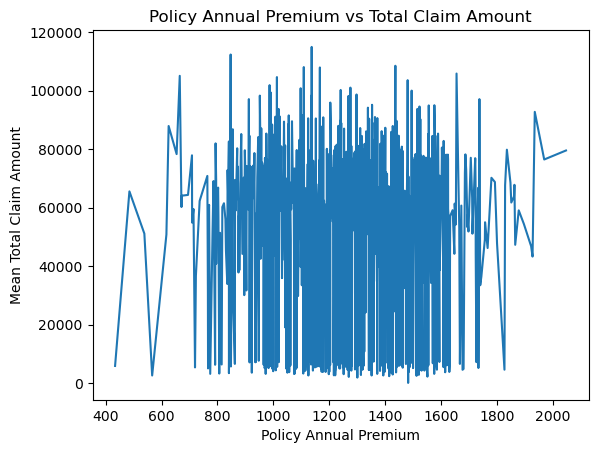

In [10]:
df_sample = df1.sample(n=1000)
df_grouped = df_sample.groupby('policy_annual_premium')['total_claim_amount'].mean()
plt.plot(df_grouped.index, df_grouped.values)
plt.title('Policy Annual Premium vs Total Claim Amount')
plt.xlabel('Policy Annual Premium')
plt.ylabel('Mean Total Claim Amount')

There is no clear relationship between policy_annual_premium and total_claim_amount.



# Data available in police report

Text(0.5, 1.0, 'police_report_available')

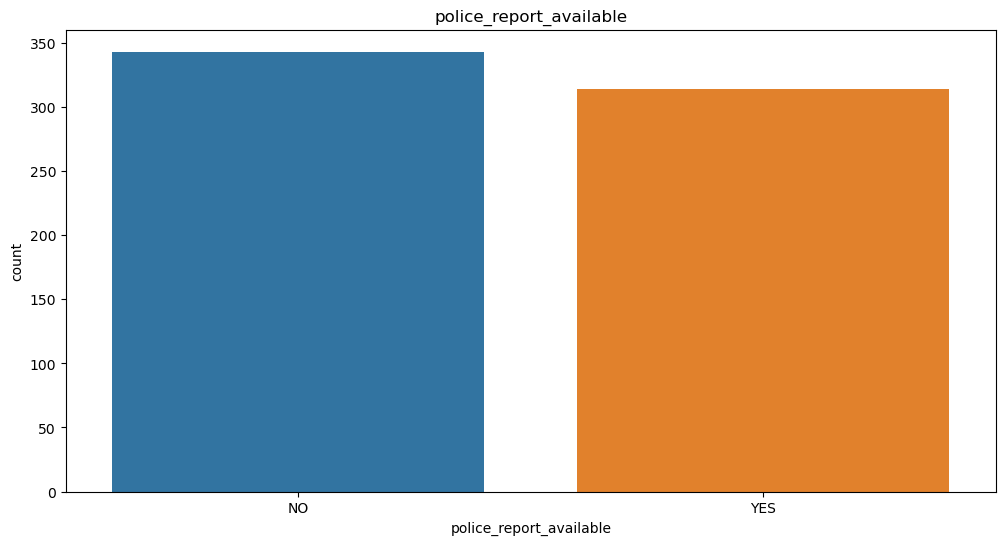

In [11]:
df1['police_report_available'].replace('?',np.nan,inplace=True)
df1.dropna()
plt.figure(figsize = (12,6))
sns.countplot(x='police_report_available',order = df1['police_report_available'].value_counts().index[0:20],data = df1)
plt.title('police_report_available')

A bar plot of police_report_available which shows the frequency of claims with and without a police report.



# How many time brands wise  vehicle apper for insurance claim


In [12]:
vehicle_brand = list(df1['vehicle_brand'].unique())
vehicle_brand_count = list(df1['vehicle_brand'].value_counts())
fig = px.pie(df1,values=vehicle_brand_count,names=vehicle_brand, hole=0.5,color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Num of vehicle brand ', title_x=0.5)
fig.update_traces(textposition='inside',textinfo='label+percent+value')
fig.show()

# How many time fraud reported case found

In [13]:
fraud_reported=list(df1['fraud_reported'].unique())
colors=('blue','red')
fraud_reported_count=list(df1['fraud_reported'].value_counts())
fig=px.pie(values=fraud_reported_count,names=fraud_reported)
fig.update_layout(title_text="Number of fraud_reported case ",title_x=0.5)
fig.update_traces(rotation=90,textposition="inside",textinfo='label+value',marker=dict(colors=colors))

# year wise insurance claim cases

Text(0.5, 1.0, 'years with most insurance claim')

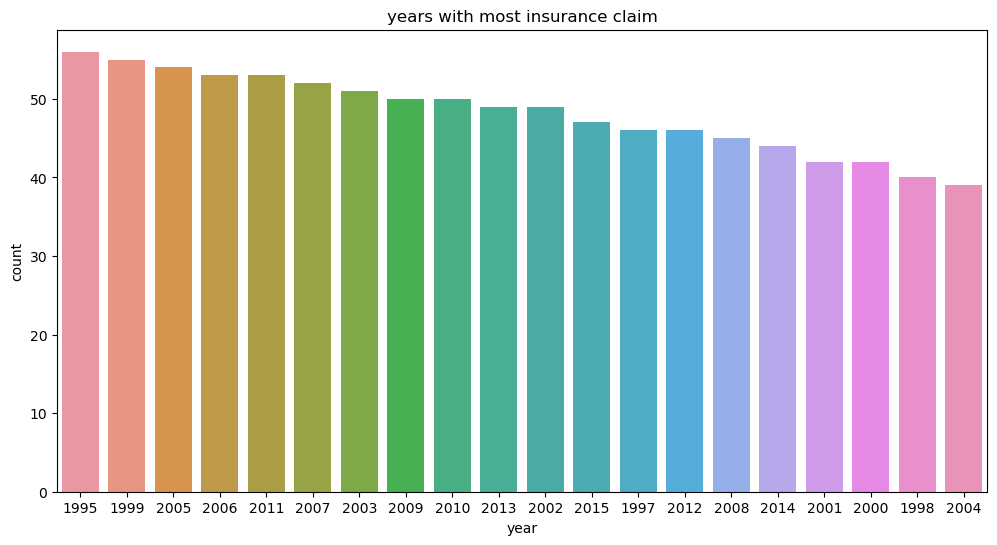

In [14]:
plt.figure(figsize = (12,6))
sns.countplot(x='year',order = df1['year'].value_counts().index[0:20],data = df1)
plt.title('years with most insurance claim')

# Total claim amount distribution in 3 parmeters = injury_claim+property_claim+vehicle_claim'


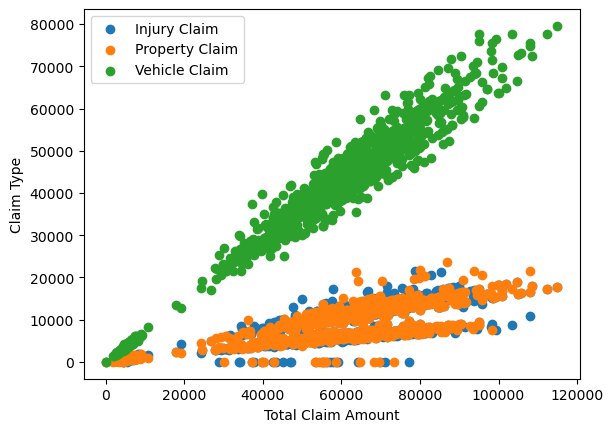

In [15]:
fig, ax = plt.subplots()
x = df1['total_claim_amount']
y1 = df1['injury_claim']
y2 = df1['property_claim']
y3 = df1['vehicle_claim']
ax.scatter(x, y1, label='Injury Claim')
ax.scatter(x, y2, label='Property Claim')
ax.scatter(x, y3, label='Vehicle Claim')
ax.legend()
ax.set_xlabel('Total Claim Amount')
ax.set_ylabel('Claim Type')
plt.show()

# To visualize these insights, we created several graphs:
* A histogram  plot of age range vs policy_annual_premium amount which shows the relation between the two variables.
* A bar plot of age vs total_claim_amount which shows the positive correlation between the two variables.
* A line plot of policy_annual_premium vs total_claim_amount which shows the lack of clear relationship between the two variables.
* A bar plot of police_report_available which shows the frequency of claims with and without a police report.
* A donut chart of vehicle_brand which shows the frequency of each make in the dataset.
* A pie chart shows number of fraud case reported  
* A bar count plot shows the most insurance case claim 
* a scatter plot shoes the total claim amount divide in injury,property and vehicle claim 



# Some ideas for future work on this topic using other relevant datasets include:

1. Analyzing the impact of different types of insurance coverage (e.g. liability, collision, comprehensive) on the likelihood of filing a claim and the amount of payout.

2. Exploring the relationship between location (e.g. state, city) and insurance claims.

3. Analyzing trends in insurance claims over time to identify patterns or changes in the industry.
